<a href="https://colab.research.google.com/github/Xoailomo/Machine-Learning-Model/blob/main/ml_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 align="center"> Dự đoán Khách hàng Rời bỏ Dịch vụ Viễn thông <h3/>

### **GROUP: 2**
**Group member:**
1. HE19XXX - Nguyen Yen Nhi
2. HE19XXX - Hoang Bao Khanh
3. HE18XXX - Nguyen Huu Hoang Than
4. HE190252 - Vu Thi Khanh Huyen
5. HE194956 - Phan Vinh Khoa

### **Phần 1: Giới thiệu bài toán và Mục tiêu**
**Customer Churn** là hiện tượng khách hàng ngừng sử dụng dịch vụ của một công ty. Và cụ thể trong bài toán này là đối với ngành viễn thông. Việc dự đoán những khách hàng có nguy cơ rời bỏ sẽ giúp công ty đưa ra chiến lược giữ chân phù hợp như các chương trình khuyến mãi, cải thiện dịch vụ... từ đó duy trì sự phát triển bền vững

**Mục tiêu:**
- Xây dựng một mô hình học máy có khả năng dự đoán chính xác một khách hàng có khả năng rời bỏ dịch vụ hay không (Churn = Yes/No).
- Thực hiện Phân tích Dữ liệu Khám phá (EDA) để tìm ra các yếu tố (đặc điểm, hành vi) có ảnh hưởng lớn nhất đến quyết định rời bỏ của khách hàng.

Bộ dữ liệu [**Telco Customer Churn**](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) thu thập từ Kaggle, chứa thông tin về khách hàng của công ty viễn thông.

### **Phần 2: Cài đặt và Tải bộ dữ liệu**

In [ ]:
# Temporarily suppress warnings
options(warn = -1)

# List of packages to install
# This list includes packages for data manipulation, visualization, and machine learning.
packages <- c(
  "tidyverse",
  "corrplot",
  "gridExtra",
  "caret",
  "rpart",
  "rpart.plot",
  "randomForest",
  "ROSE",
  "pROC",
  "knitr"
)

# Install and load packages
# Check if each package is installed, if not, install it and then load it
for (pkg in packages) {
  if (!require(pkg, character.only = TRUE)) {
    install.packages(pkg, dependencies = TRUE)
    library(pkg, character.only = TRUE)
  }
}

### **Phần 3: Load dữ liệu và tìm hiểu cơ bản**

In [ ]:
# Load the dataset
df = read.csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
# Display the first few rows of the dataset
head(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [ ]:
# Display the last few rows of the dataset
tail(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
7038,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,⋯,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7042,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7043,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,⋯,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [ ]:
# Display the structure of the dataset
str(df)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: chr  "Yes"

**Nhận xét:**
- Dữ liệu có 7043 records và 21 features
- Ngoại trừ ```customerID```, ```tenure```, ```MonthlyCharges```, ```TotalCharges```, hầu hết các biến phân loại đang ở dạng ```char```. Chúng ta cần chuyển chúng sang dạng ```factor``` ở bước tiền xử lý
- ```SeniorCitizen``` là biến ```int```, nhưng về bản chất là biến phân loại (0 hoặc 1). Chúng ta cũng sẽ chuyển nó thành factor.

### **Phần 4: Domain Knowledge và EDA**

#### **1. Domain Knowledge**

Dựa vào các features mà ở trên ta tổng hợp từ dataset. Ta đi tìm hiểu ý nghĩa của các features đó:

*   **Thông tin Nhân khẩu học & Nhận dạng:**
    *   `customerID`: Mã định danh duy nhất cho mỗi khách hàng.
    *   `gender`: Giới tính (Male, Female).
    *   `SeniorCitizen`: Cho biết khách hàng có phải là người cao tuổi hay không (1 = Có, 0 = Không).
    *   `Partner`: Khách hàng có bạn đời hay không (Yes, No).
    *   `Dependents`: Khách hàng có người phụ thuộc (con cái, cha mẹ...) hay không (Yes, No).

*   **Thông tin Tài khoản Khách hàng:**
    *   `tenure`: Số tháng khách hàng đã sử dụng dịch vụ của công ty. Đây là một chỉ số quan trọng về lòng trung thành.
    *   `Contract`: Loại hợp đồng khách hàng đã ký (Month-to-month: hàng tháng, One year: một năm, Two year: hai năm). Hợp đồng dài hạn thường cho thấy sự cam kết cao hơn.
    *   `PaperlessBilling`: Khách hàng có sử dụng hóa đơn điện tử không (Yes, No).
    *   `PaymentMethod`: Phương thức thanh toán (Electronic check: séc điện tử, Mailed check: séc qua thư, Bank transfer (automatic): chuyển khoản tự động, Credit card (automatic): thẻ tín dụng tự động).
    *   `MonthlyCharges`: Chi phí khách hàng phải trả hàng tháng.
    *   `TotalCharges`: Tổng số tiền khách hàng đã trả cho công ty.

*   **Thông tin về Dịch vụ đã Đăng ký:**
    *   `PhoneService`: Khách hàng có đăng ký dịch vụ điện thoại không (Yes, No).
    *   `MultipleLines`: Khách hàng có đăng ký nhiều đường dây điện thoại không (Yes, No, No phone service).
    *   `InternetService`: Nhà cung cấp dịch vụ internet của khách hàng (DSL, Fiber optic, No).
    *   Các cột còn lại là các dịch vụ cộng thêm, cho thấy mức độ "gắn bó" của khách hàng với hệ sinh thái của công ty:
        *   `OnlineSecurity`: Dịch vụ bảo mật trực tuyến.
        *   `OnlineBackup`: Dịch vụ sao lưu trực tuyến.
        *   `DeviceProtection`: Dịch vụ bảo vệ thiết bị.
        *   `TechSupport`: Dịch vụ hỗ trợ kỹ thuật.
        *   `StreamingTV`: Dịch vụ truyền hình trực tuyến.
        *   `StreamingMovies`: Dịch vụ xem phim trực tuyến.
        *(Giá trị "No internet service" cho biết khách hàng không dùng internet của công ty, do đó không thể dùng các dịch vụ cộng thêm này).*

*   **Target Variable:**
    *   `Churn`: Cho biết khách hàng có rời bỏ hay không (Yes, No). **Đây là cột chúng ta cần dự đoán.**

#### **2. Một vài tác vụ xử lý cơ bản ban đầu**

In [ ]:
# Check for missing values in each column
colSums(is.na(df))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

Có 11 giá trị trong ```TotalCharges``` là NA

In [ ]:
# List the columns with missing values
df[is.na(df$TotalCharges), c("tenure", "Contract", "MonthlyCharges", "TotalCharges")]

,tenure,Contract,MonthlyCharges,TotalCharges
,<int>,<chr>,<dbl>,<dbl>
489,0,Two year,52.55,NA
754,0,Two year,20.25,NA
937,0,Two year,80.85,NA
1083,0,Two year,25.75,NA
1341,0,Two year,56.05,NA
3332,0,Two year,19.85,NA
3827,0,Two year,25.35,NA
4381,0,Two year,20.00,NA
5219,0,One year,19.70,NA


Ta nhận thấy, các khách hàng này đều có ```tenure = 0```, tức là thời gian sử dụng đang bằng 0, tức là họ là khách hàng mới, chưa có kỳ thanh toán nào nên ```TotalCharges``` bị trống là hoàn toàn hợp lý. ```TotalCharges``` là **tổng số tiền tích lũy** mà khách hàng đã trả cho công ty từ lúc bắt đầu sử dụng dịch vụ cho tới thời điểm dữ liệu được thu thập. Và như ta thấy, họ chưa hoàn thành bất kỳ tháng dịch vụ nào nên ta sẽ gán giá trị là **0**

In [ ]:
# Convert 'SeniorCitizen' to factor
df$SeniorCitizen <- as.factor(df$SeniorCitizen)

# 'No internet service' is a special case in some columns, we will convert it to 'No'
cols_to_clean <- c('OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies')
for (col in cols_to_clean) {
  df[[col]] <- gsub("No internet service", "No", df[[col]])
}

#### **3. Quan sát dữ liệu của target ```Churn```**

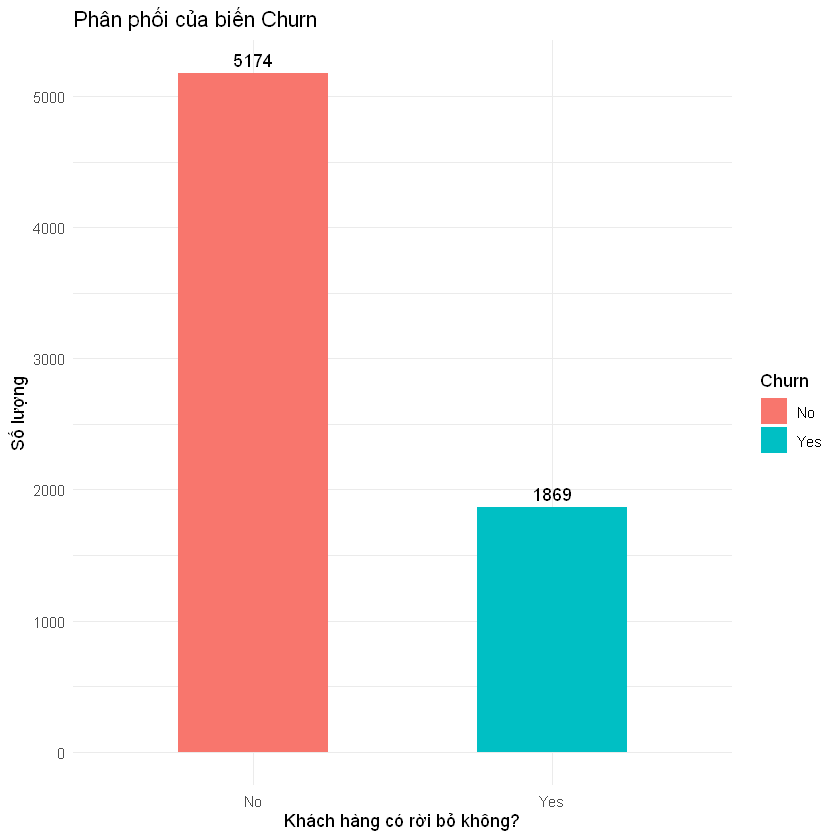

In [ ]:
ggplot(df, aes(x = Churn, fill = Churn)) +
  geom_bar(width=0.5) +
  geom_text(stat='count', aes(label=..count..), vjust=-0.5) +
  labs(title = "Phân phối của biến Churn",
       x = "Khách hàng có rời bỏ không?",
       y = "Số lượng") +
  theme_minimal()

Bộ dữ liệu của chúng ta mất cân bằng, với số lượng khách hàng ở lại (No) gấp gần 3 lần số khách hàng rời đi (Yes) - 26.5%. Điều này rất quan trọng và chúng ta sẽ phải giải quyết nó trong giai đoạn xây dựng mô hình.

#### **4. Phân tích mối quan hệ giữa các biến và target (```Churn```)**

##### Demographic

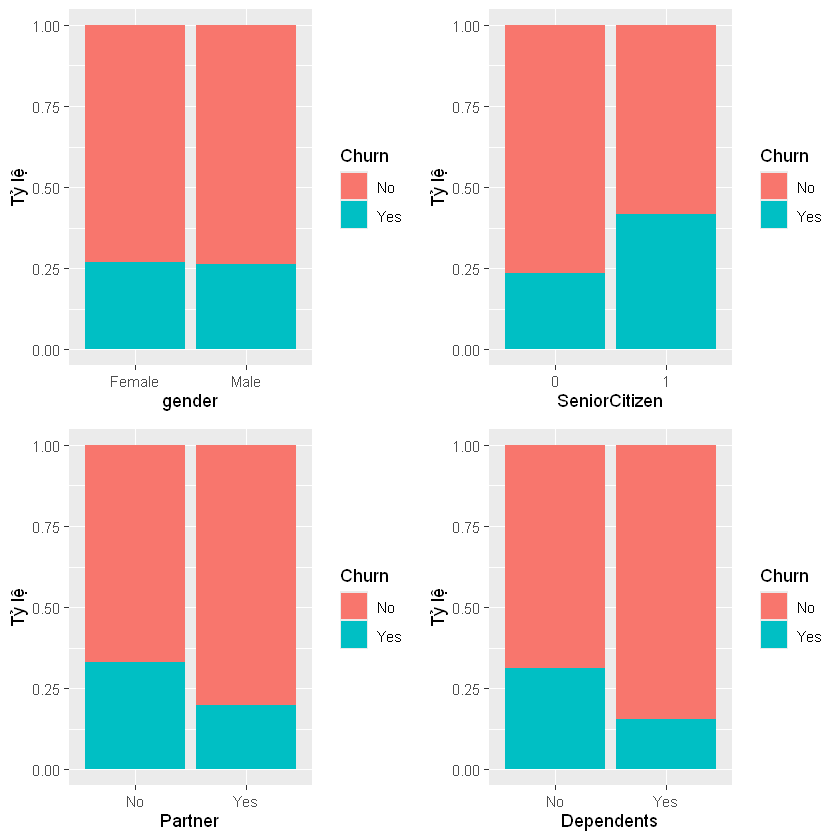

In [ ]:
plot1 <- ggplot(df, aes(x=gender, fill=Churn)) + geom_bar(position="fill") + labs(y="Tỷ lệ")
plot2 <- ggplot(df, aes(x=SeniorCitizen, fill=Churn)) + geom_bar(position="fill") + labs(y="Tỷ lệ")
plot3 <- ggplot(df, aes(x=Partner, fill=Churn)) + geom_bar(position="fill") + labs(y="Tỷ lệ")
plot4 <- ggplot(df, aes(x=Dependents, fill=Churn)) + geom_bar(position="fill") + labs(y="Tỷ lệ")

grid.arrange(plot1, plot2, plot3, plot4, ncol=2)

- Dựa theo giới tính thì tỷ lệ churn giữa nam và nữ không có sự khác biệt
- Đối với người cao tuổi có tỷ lệ churn cao hơn so với người không phải cao tuổi
- Các yếu tố như có partner hay có dependents không cũng có thể là một yếu tố ảnh hưởng

##### Tenure and Contract

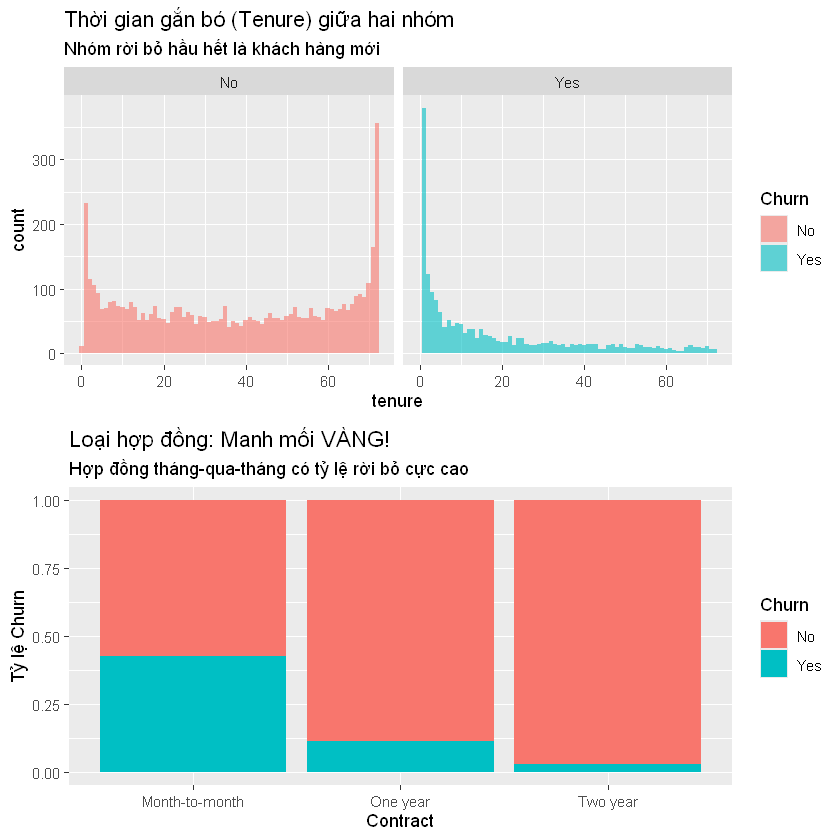

In [ ]:
p_tenure <- ggplot(df, aes(x=tenure, fill=Churn)) +
            geom_histogram(binwidth=1, position="identity", alpha=0.6) +
            facet_wrap(~Churn) +
            labs(title="Thời gian gắn bó (Tenure) giữa hai nhóm", subtitle="Nhóm rời bỏ hầu hết là khách hàng mới")

p_contract <- ggplot(df, aes(x=Contract, fill=Churn)) +
              geom_bar(position="fill") +
              labs(y="Tỷ lệ Churn", title="Loại hợp đồng: Manh mối VÀNG!",
                   subtitle="Hợp đồng tháng-qua-tháng có tỷ lệ rời bỏ cực cao")

grid.arrange(p_tenure, p_contract, nrow=2)

- Dựa theo hình của tenure. Khách hàng rời bỏ chủ yếu là khách hàng mới.
- Còn nếu ta quan sát Contract, tỷ lệ rời bỏ của hợp đồng Month-to-month cao hơn hẳn so với những khách hàng ký hợp đồng dài hạn (1 hoặc 2 năm) gần như không rời đi.

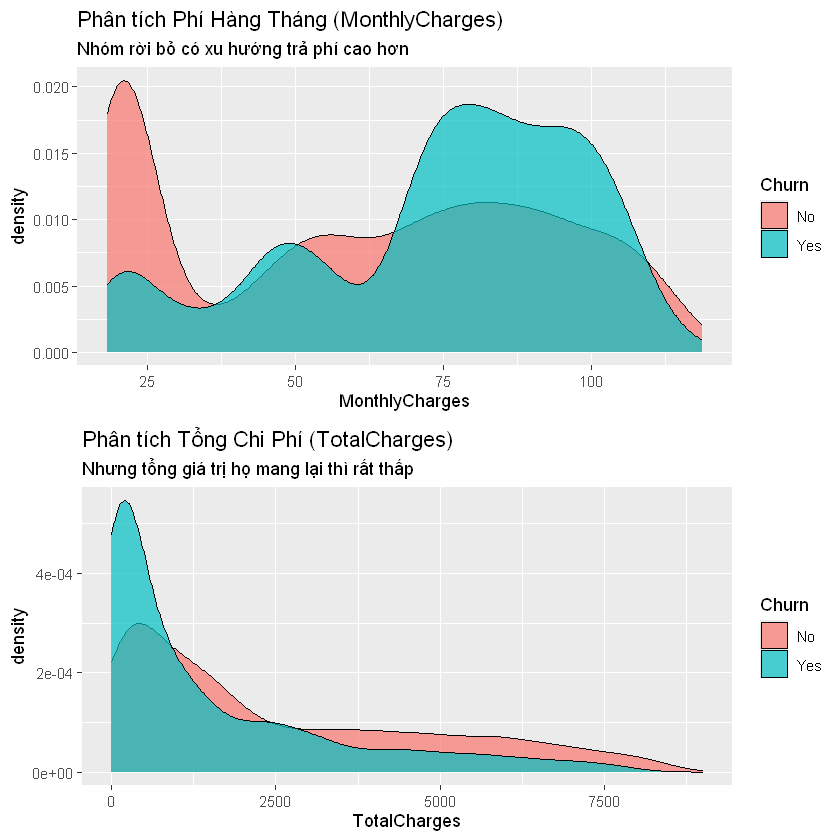

In [ ]:
p_monthly <- ggplot(df, aes(x=MonthlyCharges, fill=Churn)) +
             geom_density(alpha=0.7) +
             labs(title="Phân tích Phí Hàng Tháng (MonthlyCharges)",
                  subtitle="Nhóm rời bỏ có xu hướng trả phí cao hơn")

p_total <- ggplot(df, aes(x=TotalCharges, fill=Churn)) +
           geom_density(alpha=0.7) + xlim(0, 9000) + # Giới hạn x để dễ nhìn
           labs(title="Phân tích Tổng Chi Phí (TotalCharges)",
                subtitle="Nhưng tổng giá trị họ mang lại thì rất thấp")

grid.arrange(p_monthly, p_total, ncol=1)

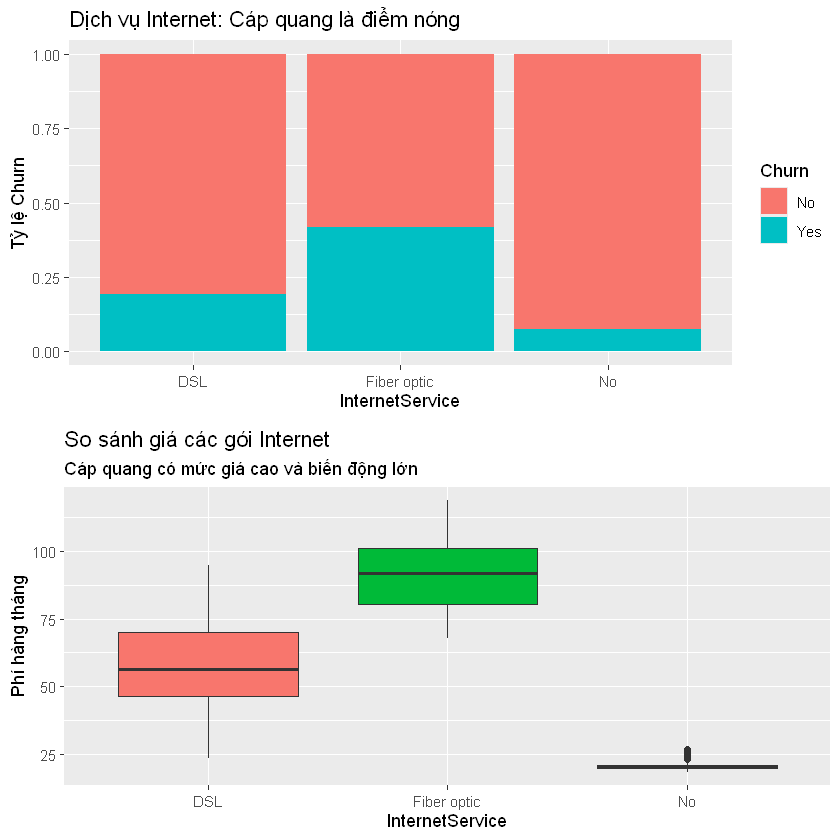

In [ ]:
p_iservice <- ggplot(df, aes(x=InternetService, fill=Churn)) +
              geom_bar(position="fill") +
              labs(y="Tỷ lệ Churn", title="Dịch vụ Internet: Cáp quang là điểm nóng")

p_is_price <- ggplot(df, aes(x=InternetService, y=MonthlyCharges, fill=InternetService)) +
              geom_boxplot() +
              labs(y="Phí hàng tháng", title="So sánh giá các gói Internet",
                   subtitle="Cáp quang có mức giá cao và biến động lớn") +
              theme(legend.position = "none")

grid.arrange(p_iservice, p_is_price, ncol=1)

- Yếu tố về **contract** là một yếu tố cực kỳ quan trọng. Ta sẽ thấy khách hàng với hợp đồng dài hạn hơn, tỷ lệ rời bỏ dịch vụ sẽ thấp hơn.
- Còn đối với

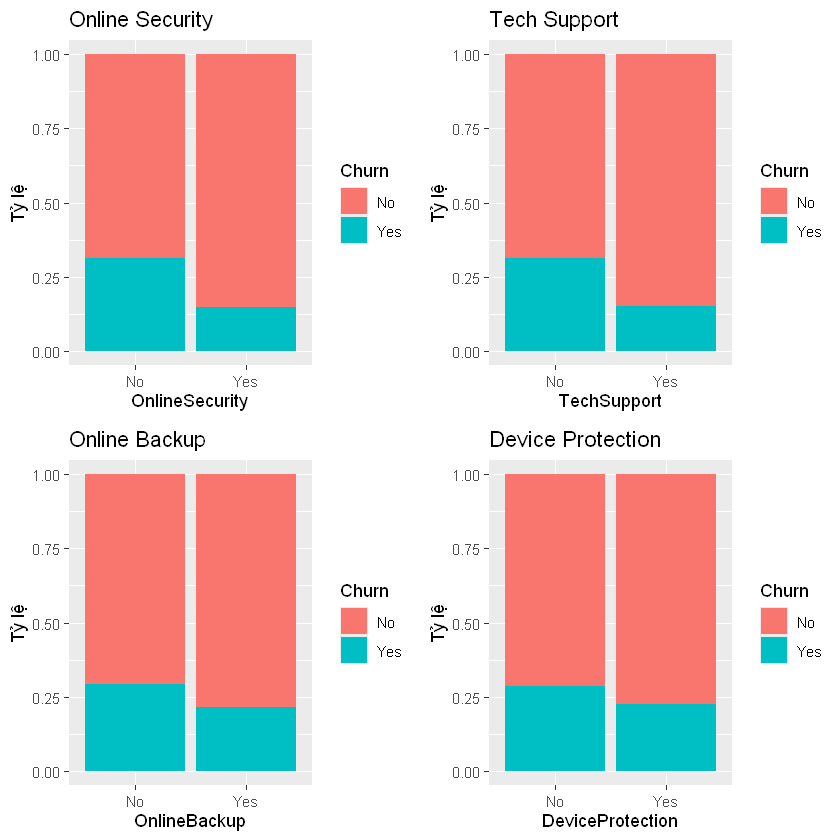

In [ ]:
# Phân tích các dịch vụ cộng thêm
plot_sec <- ggplot(df, aes(x=OnlineSecurity, fill=Churn)) + geom_bar(position="fill") + labs(y="Tỷ lệ", title="Online Security")
plot_sup <- ggplot(df, aes(x=TechSupport, fill=Churn)) + geom_bar(position="fill") + labs(y="Tỷ lệ", title="Tech Support")
plot_bak <- ggplot(df, aes(x=OnlineBackup, fill=Churn)) + geom_bar(position="fill") + labs(y="Tỷ lệ", title="Online Backup")
plot_dev <- ggplot(df, aes(x=DeviceProtection, fill=Churn)) + geom_bar(position="fill") + labs(y="Tỷ lệ", title="Device Protection")

grid.arrange(plot_sec, plot_sup, plot_bak, plot_dev, ncol=2)

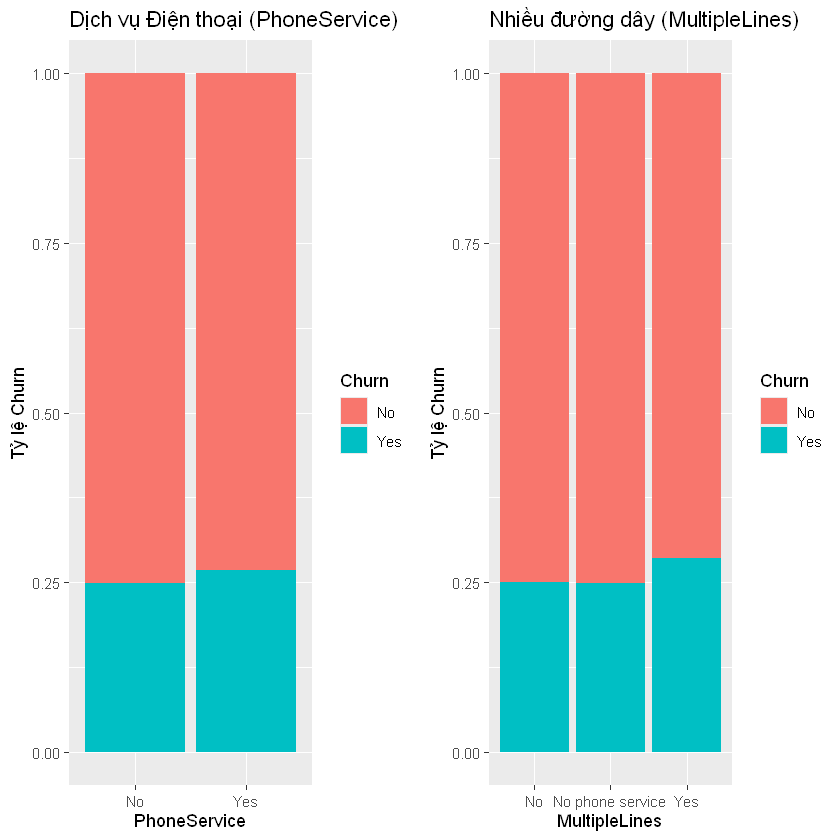

In [ ]:
# Biểu đồ 7: PhoneService và MultipleLines
p_phone <- ggplot(df, aes(x=PhoneService, fill=Churn)) +
           geom_bar(position="fill") +
           labs(y="Tỷ lệ Churn", title="Dịch vụ Điện thoại (PhoneService)")

p_multi <- ggplot(df, aes(x=MultipleLines, fill=Churn)) +
           geom_bar(position="fill") +
           labs(y="Tỷ lệ Churn", title="Nhiều đường dây (MultipleLines)")

grid.arrange(p_phone, p_multi, ncol=2)

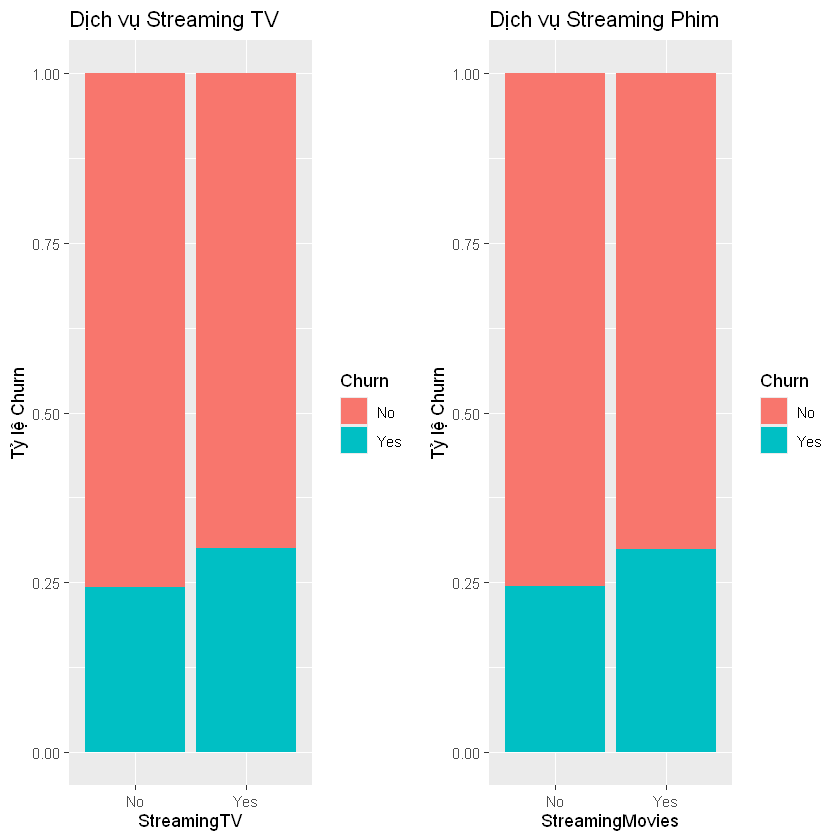

In [ ]:
# Biểu đồ 8: StreamingTV và StreamingMovies
p_tv <- ggplot(df, aes(x=StreamingTV, fill=Churn)) +
        geom_bar(position="fill") +
        labs(y="Tỷ lệ Churn", title="Dịch vụ Streaming TV")

p_movie <- ggplot(df, aes(x=StreamingMovies, fill=Churn)) +
           geom_bar(position="fill") +
           labs(y="Tỷ lệ Churn", title="Dịch vụ Streaming Phim")

grid.arrange(p_tv, p_movie, ncol=2)

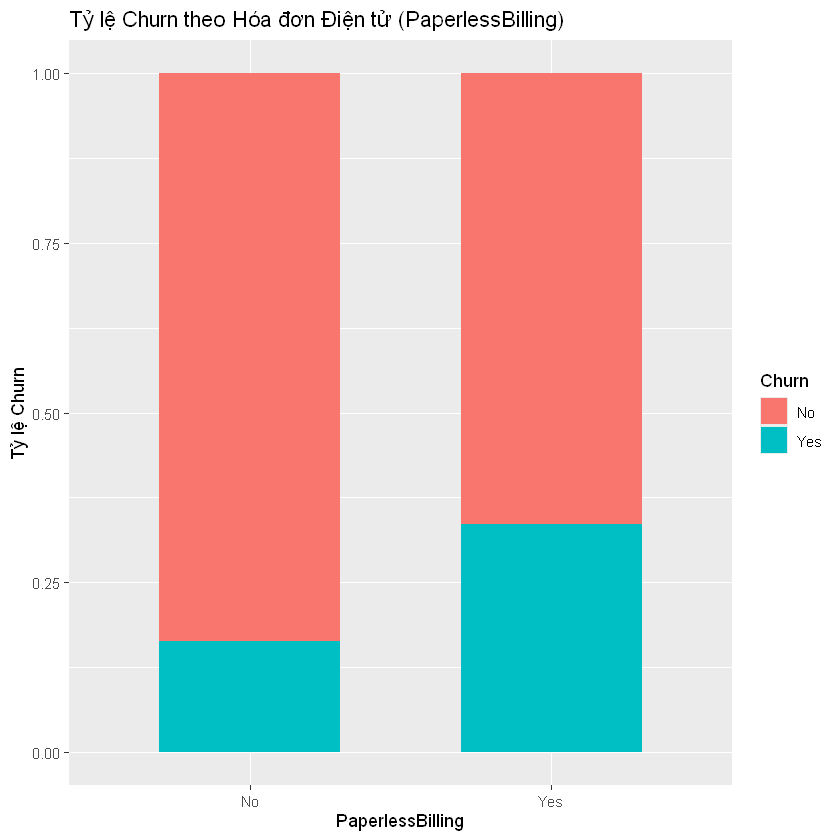

In [ ]:
# Biểu đồ 9: PaperlessBilling
ggplot(df, aes(x = PaperlessBilling, fill = Churn)) +
  geom_bar(position = "fill", width=0.6) +
  labs(y = "Tỷ lệ Churn", title = "Tỷ lệ Churn theo Hóa đơn Điện tử (PaperlessBilling)")

**5. Phân tích tương quan giữa các biến số**

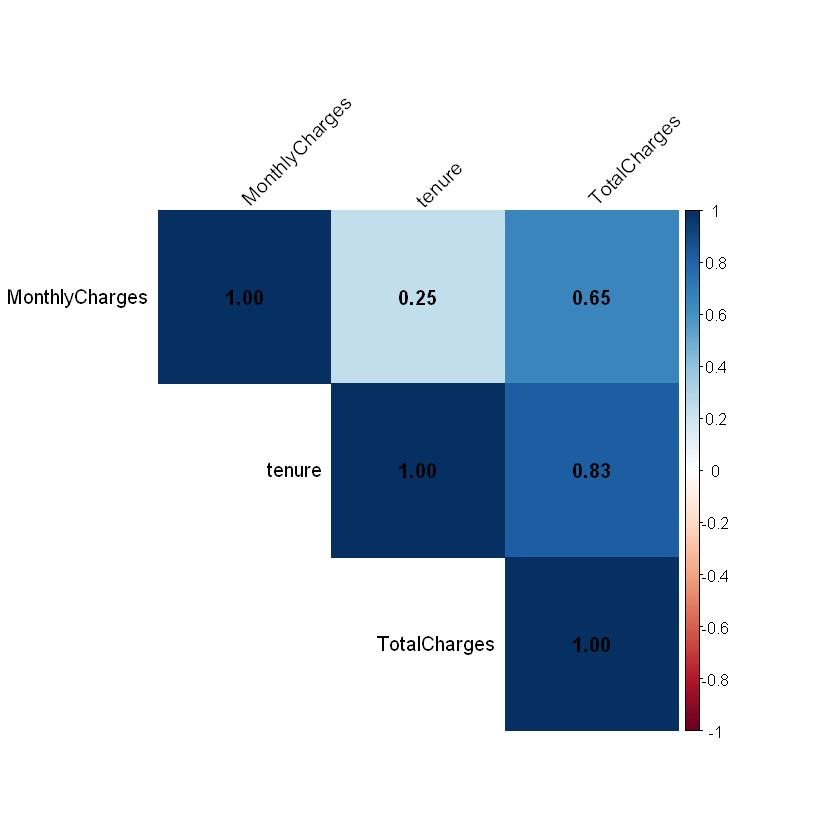

In [ ]:
# Chọn các biến số
numeric_vars <- df[, c("tenure", "MonthlyCharges", "TotalCharges")]

# Tính ma trận tương quan
cor_matrix <- cor(numeric_vars, use="complete.obs")

# Trực quan hóa ma trận tương quan
corrplot(cor_matrix, method="color", type="upper", order="hclust",
         addCoef.col = "black", tl.col="black", tl.srt=45, sig.level = 0.01, insig = "blank")

1.  **Tenure và TotalCharges (Tương quan: 0.83 - Rất mạnh):**
    *   **Quan sát:** Đây là ô màu xanh dương đậm nhất, với hệ số tương quan lên tới 0.83.
    *   **Diễn giải:** Đây là một manh mối **rõ như ban ngày và hoàn toàn hợp lý**. Nó nói rằng: **"Khách hàng ở càng lâu (`tenure` cao) thì tổng số tiền họ đã trả (`TotalCharges`) càng lớn."** Điều này khẳng định dữ liệu của chúng ta nhất quán và đáng tin cậy.
    *   **Cảnh báo cho mô hình:** Mối tương quan rất cao này là một lá cờ đỏ cho hiện tượng **đa cộng tuyến (multicollinearity)**. Nếu chúng ta đưa cả hai biến này vào một số mô hình (như Hồi quy Logistic), mô hình có thể bị "bối rối" vì không biết nên phân bổ tầm quan trọng cho biến nào. Chúng gần như đang kể cùng một câu chuyện.

2.  **MonthlyCharges và TotalCharges (Tương quan: 0.65 - Mạnh):**
    *   **Quan sát:** Một mối tương quan dương mạnh, nhưng không bằng cặp trên.
    *   **Diễn giải:** Cũng rất logic: **"Những khách hàng trả phí hàng tháng cao hơn thì cũng có xu hướng tích lũy tổng chi phí cao hơn."**
    *   **Cảnh báo cho mô hình:** Điều này càng củng cố thêm lo ngại về đa cộng tuyến. Biến `TotalCharges` có vẻ như là "họ hàng gần" của cả `tenure` và `MonthlyCharges`. Về cơ bản, `TotalCharges ≈ tenure * MonthlyCharges` (một cách xấp xỉ).

3.  **Tenure và MonthlyCharges (Tương quan: 0.25 - Yếu):**
    *   **Quan sát:** Mối tương quan dương nhưng khá yếu. Ô màu rất nhạt.
    *   **Diễn giải:** Đây là một manh mối **tinh vi và thú vị**. Nó cho thấy có một xu hướng nhỏ là "khách hàng lâu năm có xu hướng trả phí hàng tháng cao hơn một chút", nhưng không phải lúc nào cũng đúng. Có thể là do khách hàng trung thành có xu hướng nâng cấp gói cước, hoặc công ty tăng giá theo thời gian.
    *   **Ý nghĩa cho mô hình:** Vì tương quan yếu, hai biến này cung cấp những thông tin phần lớn là **độc lập** với nhau. Đây là một tin tốt! Chúng ta có thể tự tin sử dụng cả hai để cung cấp hai góc nhìn khác nhau cho mô hình: một về lòng trung thành (`tenure`), một về giá trị gói cước hiện tại (`MonthlyCharges`).

**Kết luận của Chương 5 và Kế hoạch hành động:**

Cuộc điều tra mối quan hệ nội bộ đã phát hiện ra một vấn đề tiềm ẩn: **Đa cộng tuyến giữa `tenure` và `TotalCharges`**.

Để mô hình của chúng ta hoạt động hiệu quả và dễ diễn giải hơn, chúng ta cần đưa ra một quyết định chiến lược:

*   **Hành động đề xuất:** **Loại bỏ biến `TotalCharges`** ra khỏi danh sách các biến đặc trưng khi huấn luyện mô hình.
*   **Lý do:**
    *   `TotalCharges` mang thông tin gần như trùng lặp với `tenure`.
    *   `tenure` là một biến gốc, trực tiếp đo lường lòng trung thành và dễ hiểu hơn.
    *   `MonthlyCharges` đo lường giá trị hiện tại của gói cước, một thông tin quan trọng và độc lập hơn.

--------------

#### **1. Tổng quan**

Báo cáo này trình bày kết quả từ quá trình Phân tích Dữ liệu Khám phá (Exploratory Data Analysis - EDA) trên bộ dữ liệu "Telco Customer Churn". Mục tiêu chính của phân tích là xác định các đặc điểm và yếu tố chính có mối tương quan mạnh mẽ với tỷ lệ rời bỏ (churn) của khách hàng. Kết quả phân tích cho thấy tỷ lệ rời bỏ chung là **26.5%**, một con số đáng kể đòi hỏi sự xem xét kỹ lưỡng để đưa ra các giải pháp kinh doanh phù hợp.

Phân tích chỉ ra rằng sự rời bỏ không phải là kết quả của một yếu tố đơn lẻ mà là sự cộng hưởng của nhiều yếu tố liên quan đến cam kết hợp đồng, giá trị dịch vụ cảm nhận, và đặc điểm nhân khẩu học của khách hàng.

#### **2. Các Yếu tố Chính Góp phần vào Tỷ lệ Rời bỏ**

Qua quá trình phân tích, chúng tôi đã xác định được một số nhóm yếu tố có ảnh hưởng rõ rệt nhất.

##### **2.1. Yếu tố Cam kết Hợp đồng và Thanh toán**

Đây được xác định là nhóm yếu tố có tác động mạnh mẽ nhất đến quyết định ở lại hay rời đi của khách hàng.

*   **Loại hợp đồng (`Contract`):** Khách hàng sử dụng **hợp đồng tháng-qua-tháng (Month-to-month)** có tỷ lệ rời bỏ cao vượt trội (trên 42%) so với khách hàng sử dụng hợp đồng một năm (khoảng 11%) và hai năm (dưới 3%). Điều này cho thấy sự thiếu cam kết dài hạn là yếu tố rủi ro lớn nhất.
*   **Thời gian sử dụng (`tenure`):** Có mối tương quan âm mạnh mẽ giữa thời gian sử dụng và tỷ lệ rời bỏ. Phần lớn khách hàng rời bỏ có `tenure` dưới 10 tháng, đặc biệt tập trung trong những tháng đầu tiên. Ngược lại, khách hàng trung thành thường có `tenure` trên 60 tháng.
*   **Phương thức thanh toán (`PaymentMethod`):** Khách hàng thanh toán bằng **séc điện tử (Electronic check)** có tỷ lệ rời bỏ cao hơn hẳn các phương thức thanh toán tự động khác như chuyển khoản ngân hàng hoặc thẻ tín dụng. Các phương thức thủ công có thể tạo ra điểm "ma sát", khiến khách hàng cân nhắc lại chi phí mỗi kỳ thanh toán.

##### **2.2. Yếu tố Dịch vụ và Giá trị Cảm nhận**

Chất lượng và giá cả của dịch vụ là các yếu tố quan trọng thứ hai, đặc biệt là các dịch vụ liên quan đến Internet.

*   **Dịch vụ Internet (`InternetService`):** Khách hàng sử dụng dịch vụ **Internet cáp quang (Fiber optic)** có tỷ lệ rời bỏ cao hơn đáng kể so với người dùng DSL và những người không sử dụng dịch vụ Internet của công ty.
*   **Chi phí hàng tháng (`MonthlyCharges`):** Phân tích cho thấy nhóm khách hàng rời bỏ có xu hướng chi trả mức phí hàng tháng cao hơn, điều này tương ứng với chi phí cao của dịch vụ cáp quang.
*   **Dịch vụ Giá trị gia tăng:** Những khách hàng **không đăng ký** các dịch vụ hỗ trợ và bảo vệ như **Bảo mật trực tuyến (`OnlineSecurity`)** và **Hỗ trợ kỹ thuật (`TechSupport`)** có tỷ lệ rời bỏ cao gấp 2-3 lần so với những người có đăng ký. Điều này cho thấy các dịch vụ này đóng vai trò quan trọng trong việc tăng cường sự gắn kết và giá trị cảm nhận của khách hàng.

##### **2.3. Yếu tố Nhân khẩu học**

Một số đặc điểm nhân khẩu học cũng cho thấy mối liên hệ với tỷ lệ rời bỏ.

*   **Tình trạng cư trú:** Khách hàng **không có bạn đời (`Partner`)** và/hoặc **không có người phụ thuộc (`Dependents`)** có xu hướng rời bỏ cao hơn.
*   **Tuổi tác:** **Người cao tuổi (`SeniorCitizen`)** có tỷ lệ rời bỏ cao hơn nhóm khách hàng trẻ tuổi.

#### **3. Phác thảo Chân dung Khách hàng có Nguy cơ Rời bỏ Cao**

Dựa trên các phân tích trên, chúng tôi có thể phác thảo hồ sơ của một khách hàng có nguy cơ rời bỏ cao như sau:

*   Là một khách hàng tương đối **mới** (tenure thấp).
*   Đang sử dụng **hợp đồng tháng-qua-tháng (Month-to-Month)**.
*   Đăng ký dịch vụ **Internet cáp quang** với **mức phí hàng tháng cao**.
*   **Không sử dụng** các dịch vụ cộng thêm mang tính bảo vệ và hỗ trợ (ví dụ: Online Security, Tech Support).
*   Thanh toán qua **séc điện tử (Electronic check)**.
*   Có thể là **người cao tuổi** hoặc người **sống độc thân**.

### **Phần 5: Chuẩn bị dữ liệu cho mô hình**

### **5.1. Lựa chọn các biến đặc trưng cuối cùng**

*   **Loại bỏ `customerID`:** Cột này là mã định danh, không có giá trị dự đoán.
*   **Loại bỏ `TotalCharges`:** Như đã phân tích ở ma trận tương quan, `TotalCharges` có tương quan rất cao với `tenure` (0.83), gây ra hiện tượng đa cộng tuyến. Chúng ta giữ lại `tenure` (đo lường lòng trung thành) và `MonthlyCharges` (đo lường chi phí hiện tại), và loại bỏ `TotalCharges` để mô hình ổn định và dễ diễn giải hơn.

In [ ]:
# Loại bỏ các cột không cần thiết
df_model <- df %>%
  select(-customerID, -TotalCharges)

# >>> BƯỚC SỬA LỖI QUAN TRỌNG <<<
# Chuyển đổi tất cả các cột 'character' thành 'factor'
# Hàm ROSE yêu cầu các biến phân loại phải ở định dạng factor.
df_model <- df_model %>%
  mutate(across(where(is.character), as.factor))

# Kiểm tra lại kiểu dữ liệu để đảm bảo không còn cột 'character' nào
cat("Kiểu dữ liệu sau khi chuyển đổi:\n")
sapply(df_model, class)

Kiểu dữ liệu sau khi chuyển đổi:


gender    SeniorCitizen          Partner       Dependents 
        "factor"         "factor"         "factor"         "factor" 
          tenure     PhoneService    MultipleLines  InternetService 
       "integer"         "factor"         "factor"         "factor" 
  OnlineSecurity     OnlineBackup DeviceProtection      TechSupport 
        "factor"         "factor"         "factor"         "factor" 
     StreamingTV  StreamingMovies         Contract PaperlessBilling 
        "factor"         "factor"         "factor"         "factor" 
   PaymentMethod   MonthlyCharges            Churn 
        "factor"        "numeric"         "factor"

### **5.2. Phân chia Dữ liệu (Train/Test Split)**

Chúng ta sẽ chia dữ liệu thành hai phần:
*   **Tập huấn luyện (Training Set - 80%):** Dùng để "dạy" cho mô hình.
*   **Tập kiểm thử (Test Set - 20%):** Dữ liệu mà mô hình chưa từng thấy, dùng để đánh giá hiệu năng cuối cùng một cách khách quan.

**Quan trọng:** Chúng ta sẽ sử dụng phương pháp **chia có phân tầng (stratified sampling)** theo biến `Churn`. Điều này đảm bảo rằng tỷ lệ khách hàng rời bỏ trong hai tập train và test là tương đương nhau, rất cần thiết cho bài toán dữ liệu mất cân bằng.

In [ ]:
set.seed(123) # Để đảm bảo kết quả có thể tái lập

# Tạo chỉ số cho tập huấn luyện
train_index <- createDataPartition(df_model$Churn,
                                   p = 0.8,
                                   list = FALSE,
                                   times = 1)

# Tạo tập train và test
train_data <- df_model[train_index, ]
test_data  <- df_model[-train_index, ]

# Kiểm tra tỷ lệ Churn trên hai tập
print("Tỷ lệ Churn trên tập Train:")
prop.table(table(train_data$Churn))

print("Tỷ lệ Churn trên tập Test:")
prop.table(table(test_data$Churn))

[1] "Tỷ lệ Churn trên tập Train:"



       No       Yes 
0.7345635 0.2654365 

[1] "Tỷ lệ Churn trên tập Test:"



       No       Yes 
0.7348969 0.2651031 

### **5.3. Xử lý Dữ liệu Mất cân bằng (trên Tập Train)**

Như đã thấy, lớp `Churn = Yes` chỉ chiếm khoảng 26.5%. Nếu huấn luyện trực tiếp, mô hình có thể có xu hướng dự đoán "No" nhiều hơn để đạt độ chính xác cao, nhưng sẽ bỏ lỡ nhiều trường hợp "Yes" quan trọng. Chúng ta sẽ sử dụng kỹ thuật **ROSE (Random Over-Sampling Examples)** để tạo ra một tập dữ liệu huấn luyện mới, cân bằng hơn.

**Lưu ý:** Kỹ thuật này chỉ được áp dụng trên `train_data`, không được "đụng" đến `test_data` để tránh rò rỉ thông tin (data leakage).

In [ ]:
# Áp dụng ROSE để tạo tập train cân bằng
train_rose <- ROSE(Churn ~ ., data = train_data, seed = 123)$data

# Kiểm tra lại tỷ lệ Churn trên tập dữ liệu mới
print("Tỷ lệ Churn trên tập Train sau khi áp dụng ROSE:")
table(train_rose$Churn)

[1] "Tỷ lệ Churn trên tập Train sau khi áp dụng ROSE:"



  No  Yes 
2841 2795 

### **Phần 6: Xây dựng mô hình**

Chúng ta sẽ sử dụng gói `caret` để huấn luyện 3 mô hình khác nhau và so sánh hiệu suất của chúng.

### **6.1. Thiết lập Kiểm định chéo (Cross-Validation)**

Để đánh giá mô hình một cách đáng tin cậy và tránh overfitting, chúng ta sử dụng kỹ thuật **Kiểm định chéo 10-lần (10-fold Cross-Validation)**. Dữ liệu huấn luyện sẽ được chia thành 10 phần, mô hình sẽ được huấn luyện trên 9 phần và kiểm thử trên 1 phần còn lại, quá trình này lặp lại 10 lần.

In [ ]:
# Thiết lập control cho việc huấn luyện với 10-fold CV
# twoClassSummary để tính các chỉ số như ROC, Sens, Spec
ctrl <- trainControl(method = "cv",
                     number = 10,
                     classProbs = TRUE,
                     summaryFunction = twoClassSummary)

### **6.2. Huấn luyện các Mô hình**

Chúng ta sẽ huấn luyện 3 mô hình:
1.  **Hồi quy Logistic (`glm`):** Một mô hình tuyến tính, tốt để làm cơ sở (baseline).
2.  **Cây quyết định (`rpart`):** Dễ diễn giải, giúp hiểu các quy tắc mô hình học được.
3.  **Rừng ngẫu nhiên (`rf`):** Một mô hình tập hợp (ensemble) mạnh mẽ, thường cho kết quả tốt.

In [ ]:
# Huấn luyện mô hình Logistic Regression
set.seed(123)
model_glm <- train(Churn ~ .,
                   data = train_rose,
                   method = "glm",
                   family = "binomial",
                   trControl = ctrl,
                   metric = "ROC")

# Huấn luyện mô hình Decision Tree
set.seed(123)
model_rpart <- train(Churn ~ .,
                     data = train_rose,
                     method = "rpart",
                     trControl = ctrl,
                     metric = "ROC")

# Huấn luyện mô hình Random Forest
# Lưu ý: Random Forest có thể mất nhiều thời gian hơn để huấn luyện
set.seed(123)
model_rf <- train(Churn ~ .,
                  data = train_rose,
                  method = "rf",
                  trControl = ctrl,
                  metric = "ROC")

# In kết quả của các mô hình
print(model_glm)
print(model_rpart)
print(model_rf)

Generalized Linear Model 

5636 samples
  18 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5072, 5072, 5072, 5073, 5073, 5073, ... 
Resampling results:

  ROC        Sens       Spec    
  0.8512009  0.7472634  0.803565

CART 

5636 samples
  18 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5072, 5072, 5072, 5073, 5073, 5073, ... 
Resampling results across tuning parameters:

  cp          ROC        Sens       Spec     
  0.02236136  0.7608839  0.6191450  0.8593843
  0.17960644  0.6918094  0.4491796  0.9223349
  0.28407871  0.5535257  0.7210106  0.3860407

ROC was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.02236136.
Random Forest 

5636 samples
  18 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5072, 5072, 5

### **6.3. So sánh hiệu năng trên Kiểm định chéo**
Chúng ta so sánh kết quả CV của các mô hình để xem mô hình nào hoạt động ổn định và tốt nhất trên tập huấn luyện.


Call:
summary.resamples(object = results)

Models: LogisticRegression, DecisionTree, RandomForest 
Number of resamples: 10 

ROC 
                        Min.   1st Qu.    Median      Mean   3rd Qu.      Max.
LogisticRegression 0.8406841 0.8443631 0.8475937 0.8512009 0.8608305 0.8654526
DecisionTree       0.7302173 0.7377803 0.7519037 0.7608839 0.7851358 0.8074360
RandomForest       0.8788544 0.8938968 0.8974936 0.8983341 0.9070924 0.9122485
                   NA's
LogisticRegression    0
DecisionTree          0
RandomForest          0

Sens 
                        Min.   1st Qu.    Median      Mean   3rd Qu.      Max.
LogisticRegression 0.7077465 0.7332746 0.7464789 0.7472634 0.7632042 0.7887324
DecisionTree       0.5528169 0.5783451 0.5968310 0.6191450 0.6746232 0.7112676
RandomForest       0.7464789 0.7781690 0.7940141 0.7863393 0.7985946 0.8028169
                   NA's
LogisticRegression    0
DecisionTree          0
RandomForest          0

Spec 
                        Min.   

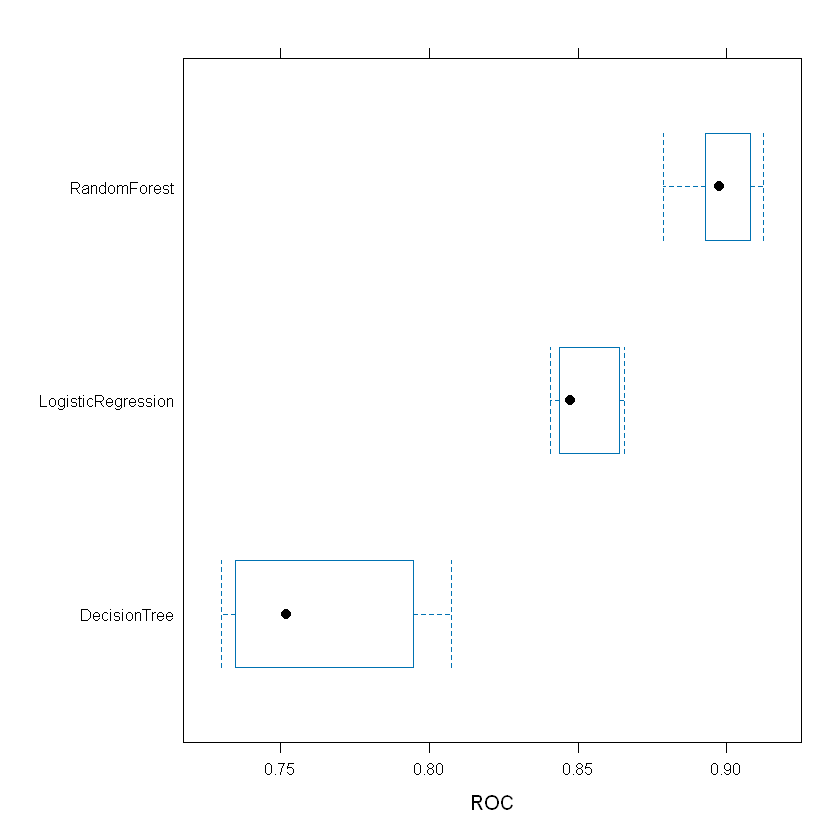

In [ ]:
# Tổng hợp kết quả từ các mô hình
results <- resamples(list(LogisticRegression = model_glm,
                          DecisionTree = model_rpart,
                          RandomForest = model_rf))

# In ra bảng tóm tắt
summary(results)

# Vẽ biểu đồ boxplot để so sánh
bwplot(results, metric = "ROC")

### **Phần 7: Đánh giá mô hình**

Bây giờ là lúc "bài kiểm tra cuối kỳ". Chúng ta sẽ dùng các mô hình đã huấn luyện để dự đoán trên `test_data` - tập dữ liệu mà chúng chưa từng thấy.

### **7.1. Dự đoán và Ma trận nhầm lẫn (Confusion Matrix)**

In [ ]:
# Dự đoán trên tập test
pred_glm <- predict(model_glm, newdata = test_data)
pred_rpart <- predict(model_rpart, newdata = test_data)
pred_rf <- predict(model_rf, newdata = test_data)

# Đánh giá bằng Confusion Matrix
cat("Confusion Matrix - Logistic Regression:\n")
confusionMatrix(pred_glm, test_data$Churn, positive = "Yes")

cat("\nConfusion Matrix - Decision Tree:\n")
confusionMatrix(pred_rpart, test_data$Churn, positive = "Yes")

cat("\nConfusion Matrix - Random Forest:\n")
confusionMatrix(pred_rf, test_data$Churn, positive = "Yes")

Confusion Matrix - Logistic Regression:


Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  744  89
       Yes 290 284
                                          
               Accuracy : 0.7306          
                 95% CI : (0.7066, 0.7537)
    No Information Rate : 0.7349          
    P-Value [Acc > NIR] : 0.6542          
                                          
                  Kappa : 0.4103          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7614          
            Specificity : 0.7195          
         Pos Pred Value : 0.4948          
         Neg Pred Value : 0.8932          
             Prevalence : 0.2651          
         Detection Rate : 0.2018          
   Detection Prevalence : 0.4080          
      Balanced Accuracy : 0.7405          
                                          
       'Positive' Class : Yes             
                              


Confusion Matrix - Decision Tree:


Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  578  40
       Yes 456 333
                                          
               Accuracy : 0.6475          
                 95% CI : (0.6219, 0.6725)
    No Information Rate : 0.7349          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.333           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8928          
            Specificity : 0.5590          
         Pos Pred Value : 0.4221          
         Neg Pred Value : 0.9353          
             Prevalence : 0.2651          
         Detection Rate : 0.2367          
   Detection Prevalence : 0.5608          
      Balanced Accuracy : 0.7259          
                                          
       'Positive' Class : Yes             
                              


Confusion Matrix - Random Forest:


Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  751 103
       Yes 283 270
                                          
               Accuracy : 0.7257          
                 95% CI : (0.7015, 0.7488)
    No Information Rate : 0.7349          
    P-Value [Acc > NIR] : 0.793           
                                          
                  Kappa : 0.39            
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7239          
            Specificity : 0.7263          
         Pos Pred Value : 0.4882          
         Neg Pred Value : 0.8794          
             Prevalence : 0.2651          
         Detection Rate : 0.1919          
   Detection Prevalence : 0.3930          
      Balanced Accuracy : 0.7251          
                                          
       'Positive' Class : Yes             
                              

### **7.2. So sánh bằng đường cong ROC và chỉ số AUC**
AUC (Area Under the Curve) là thước đo tổng quát về khả năng phân loại của mô hình, không phụ thuộc vào ngưỡng (threshold) cụ thể. AUC càng gần 1, mô hình càng tốt.


Setting levels: control = No, case = Yes

Setting direction: controls < cases

Setting levels: control = No, case = Yes

Setting direction: controls < cases

Setting levels: control = No, case = Yes

Setting direction: controls < cases



AUC - Logistic Regression: 0.8312379 
AUC - Decision Tree: 0.7363502 
AUC - Random Forest: 0.8069264 


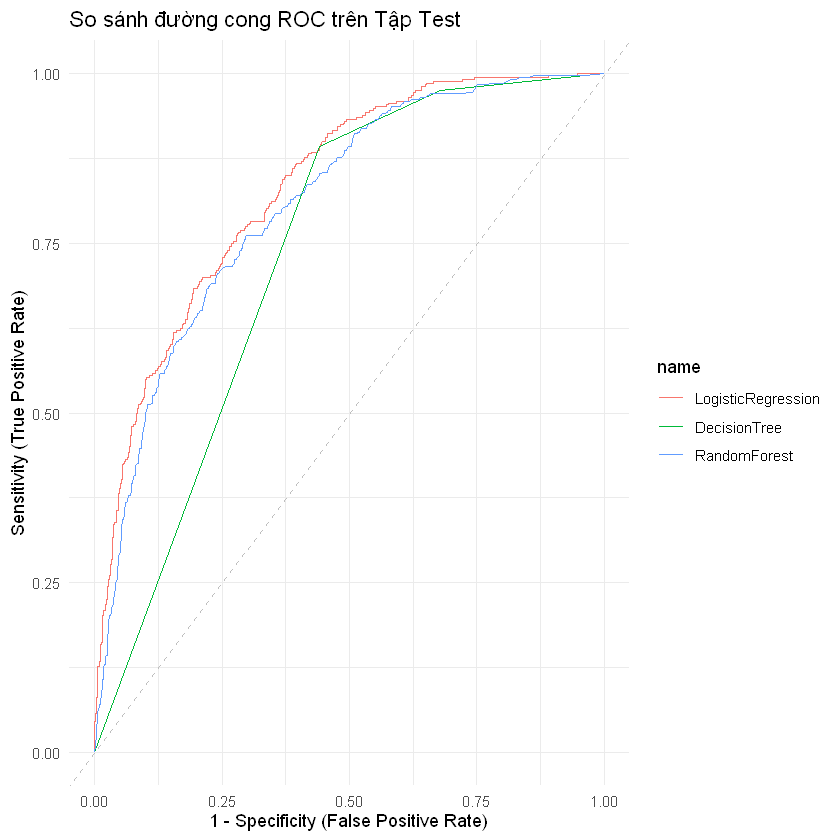

In [ ]:
# Lấy xác suất dự đoán cho lớp 'Yes'
prob_glm <- predict(model_glm, newdata = test_data, type = "prob")$Yes
prob_rpart <- predict(model_rpart, newdata = test_data, type = "prob")$Yes
prob_rf <- predict(model_rf, newdata = test_data, type = "prob")$Yes

# Tạo các đối tượng ROC
roc_glm <- roc(test_data$Churn, prob_glm)
roc_rpart <- roc(test_data$Churn, prob_rpart)
roc_rf <- roc(test_data$Churn, prob_rf)

# Vẽ các đường cong ROC trên cùng một biểu đồ
ggroc(list(LogisticRegression = roc_glm, DecisionTree = roc_rpart, RandomForest = roc_rf),
      legacy.axes = TRUE) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "grey") +
  labs(title = "So sánh đường cong ROC trên Tập Test",
       x = "1 - Specificity (False Positive Rate)",
       y = "Sensitivity (True Positive Rate)") +
  theme_minimal()

# In ra giá trị AUC
cat("AUC - Logistic Regression:", auc(roc_glm), "\n")
cat("AUC - Decision Tree:", auc(roc_rpart), "\n")
cat("AUC - Random Forest:", auc(roc_rf), "\n")

### **Phần 8: Diễn giải và Kết luận cuối cùng**
Chúng ta đã chọn được mô hình tốt nhất là Random Forest. Bây giờ, hãy xem mô hình này "nghĩ" gì và yếu tố nào là quan trọng nhất đối với nó.

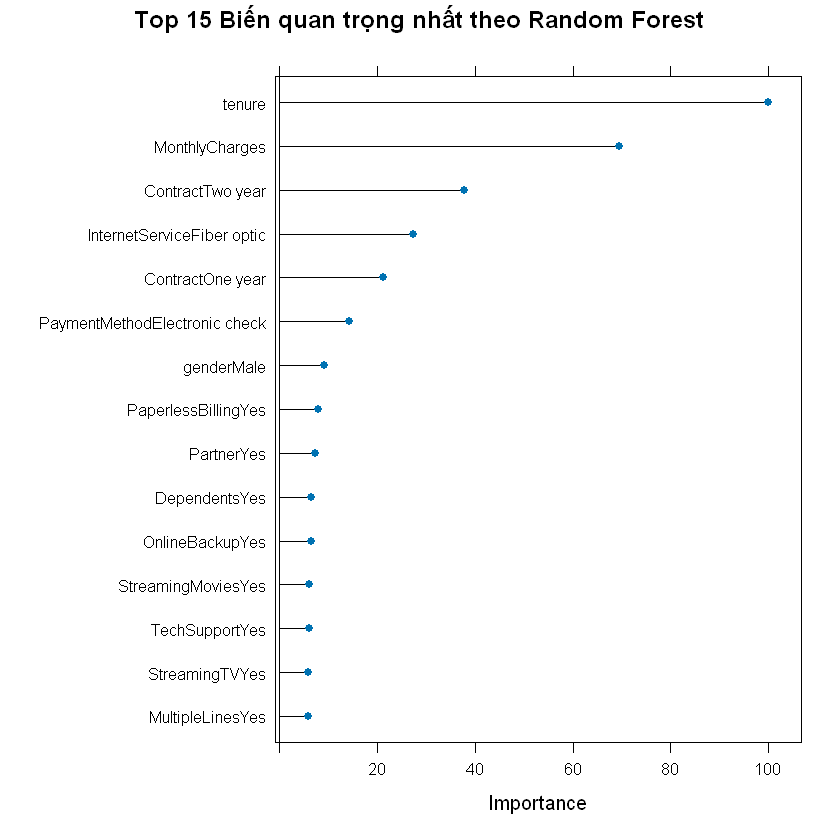

In [ ]:
# Xem mức độ quan trọng của các biến từ mô hình Random Forest
imp <- varImp(model_rf)
plot(imp, top = 15, main = "Top 15 Biến quan trọng nhất theo Random Forest")